<a href="https://colab.research.google.com/github/LongNguyen1984/DeepLearning/blob/master/UMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Umap and Umap plot

In [4]:
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

     |████████████████████████████████| 1.6MB 5.3MB/s 
     |████████████████████████████████| 15.5MB 317kB/s 
     |████████████████████████████████| 81kB 9.5MB/s 
     |████████████████████████████████| 92kB 10.2MB/s 
     |████████████████████████████████| 665kB 39.7MB/s 
     |████████████████████████████████| 102kB 10.7MB/s 
  Created wheel for datashape: filename=datashape-0.5.2-cp36-none-any.whl size=59430 sha256=ede0d70c6e6451fadceb480e5979a2b7e92ac46a22ff84b1c72e9c1c72f7674a
  Stored in directory: /root/.cache/pip/wheels/8d/06/05/c1cba3d57bdcfd3960e3f60a9fdc97e4baef2ef09af0ad1ef8
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=21d274d074ba1f58f574d973edd53051e3dc12d87fff56352ee4832d7f73f8fb
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
  Created wheel for locket: filename=locket-0.2.0-cp36-none-any.whl size=4040 sha256=3a5d373d50598efb77702107bb4e68215649b347c9664553222a33

# import all needed packages

In [6]:
import sklearn.datasets
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import pandas as pd
import umap
import umap.plot

#mnist = sklearn.datasets.fetch_openml("mnist_784")

##Import my Data

In [27]:
from pandas import read_csv
from pandas import DataFrame
import numpy as np

def load_data(filename):
  dataset = read_csv(filename, header=0);
  data = dataset.values;
  return data
def segment_data(signal, distance, overlap):
  i = 1;
  s = list()
  while int(i+distance)<len(signal):
    a = signal[int(i):int(i+distance)];
    #a = [x for x in t]
    #a = DataFrame.transpose(DataFrame(t))
    #a = np.split(a,int(distance-1)
    s.append(a)
    i = i + distance*overlap
    
  return np.asarray(s) # return a nd array
d = 110
data = load_data('drive/My Drive/InvertPhaseLong2.csv')  

ppg = segment_data(data[:,0],d,0.5)
ppg1 = segment_data(data[:,2],d,0.5)


data2 = load_data('drive/My Drive/Dataset/longcunDB2.csv') 
ppg2 = segment_data(data2[:,1],d,0.5)
ppg3 = segment_data(data2[:,0],d,0.5) # Positive with noise
s1 = ppg # convert to array
s2 = ppg1 # convert to array
s3 = ppg2 # Noise Data

## Prepare Data

In [28]:
# label for first group of Data
y1 = [-1]*s1.shape[0];
y2 = [1]*s2.shape[0];
y3 = [0]*s3.shape[0];

y1 = np.asarray(y1)
y2 = np.asarray(y2)
y3 = np.asarray(y3)
print((y1.shape, y2.shape, y3.shape))
#ydf1 = DataFrame(y1)
#ydf2 = DataFrame(y2)
# Concatenate data
X = np.concatenate((ppg, ppg1,ppg2))
y = np.concatenate((y1, y2, y3))
print(X.shape)

# rescale data
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
def scaling(signal):
  scaler = MinMaxScaler()
  s_trans = signal.transpose()
  Xscaled = scaler.fit_transform(s_trans)
  Xscaled = Xscaled.transpose()
  return Xscaled  
Xscaled = scaling(X)
Xscaled2 = scaling(ppg2)
Xscaled3 = scaling(ppg3)
#Xscaled = Xscaled.transpose()
#Xscaled2 = scaler.fit_transform(ppg2)
#print(X1T.shape)

((374,), (374,), (374,))
(1122, 110)


In [29]:

y_df = DataFrame(y, columns=['Phase'])
y =y_df['Phase']

In [30]:
Y.unique()

array([-1,  1,  0])

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xscaled, y_df, test_size=0.3, random_state=123)

In [178]:
y_train.unique()

AttributeError: ignored

In [32]:
y_df.value_counts()

Phase
 1       374
 0       374
-1       374
dtype: int64

## Mapping Data with UMAP

In [33]:
mapper = umap.UMAP(random_state=79).fit_transform(Xscaled)

    

In [152]:
mapper

UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=79, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

In [ ]:
from pandas import DataFrame
hover_data = pd.DataFrame({'index':np.arange(1767),
                           'label':y})

hover_data['item'] = hover_data.label.map(
    {
        -1:'invert-phase',
         1:'in-phase',
         0:'noise',
    }
)

In [35]:
import seaborn as sns
col_dict = {1:'#7bc90c',
            -1:'#ffb700',
            3:'#f5072f',
            4:'#d109e3',
            5: "#009dff",
            6: "#10ccb6",
            0: "#6484f5",
            8: "#ab0e3a",
            9: "#bd9e15",
            7: 'grey',
           }

class_set = y.unique()

pals = [col_dict[cl] for cl in class_set]     

 # List of RGB triplets
rgb_values = sns.color_palette(pals, 10)  

# Map label to RGB
color_map = dict(zip(class_set, rgb_values))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


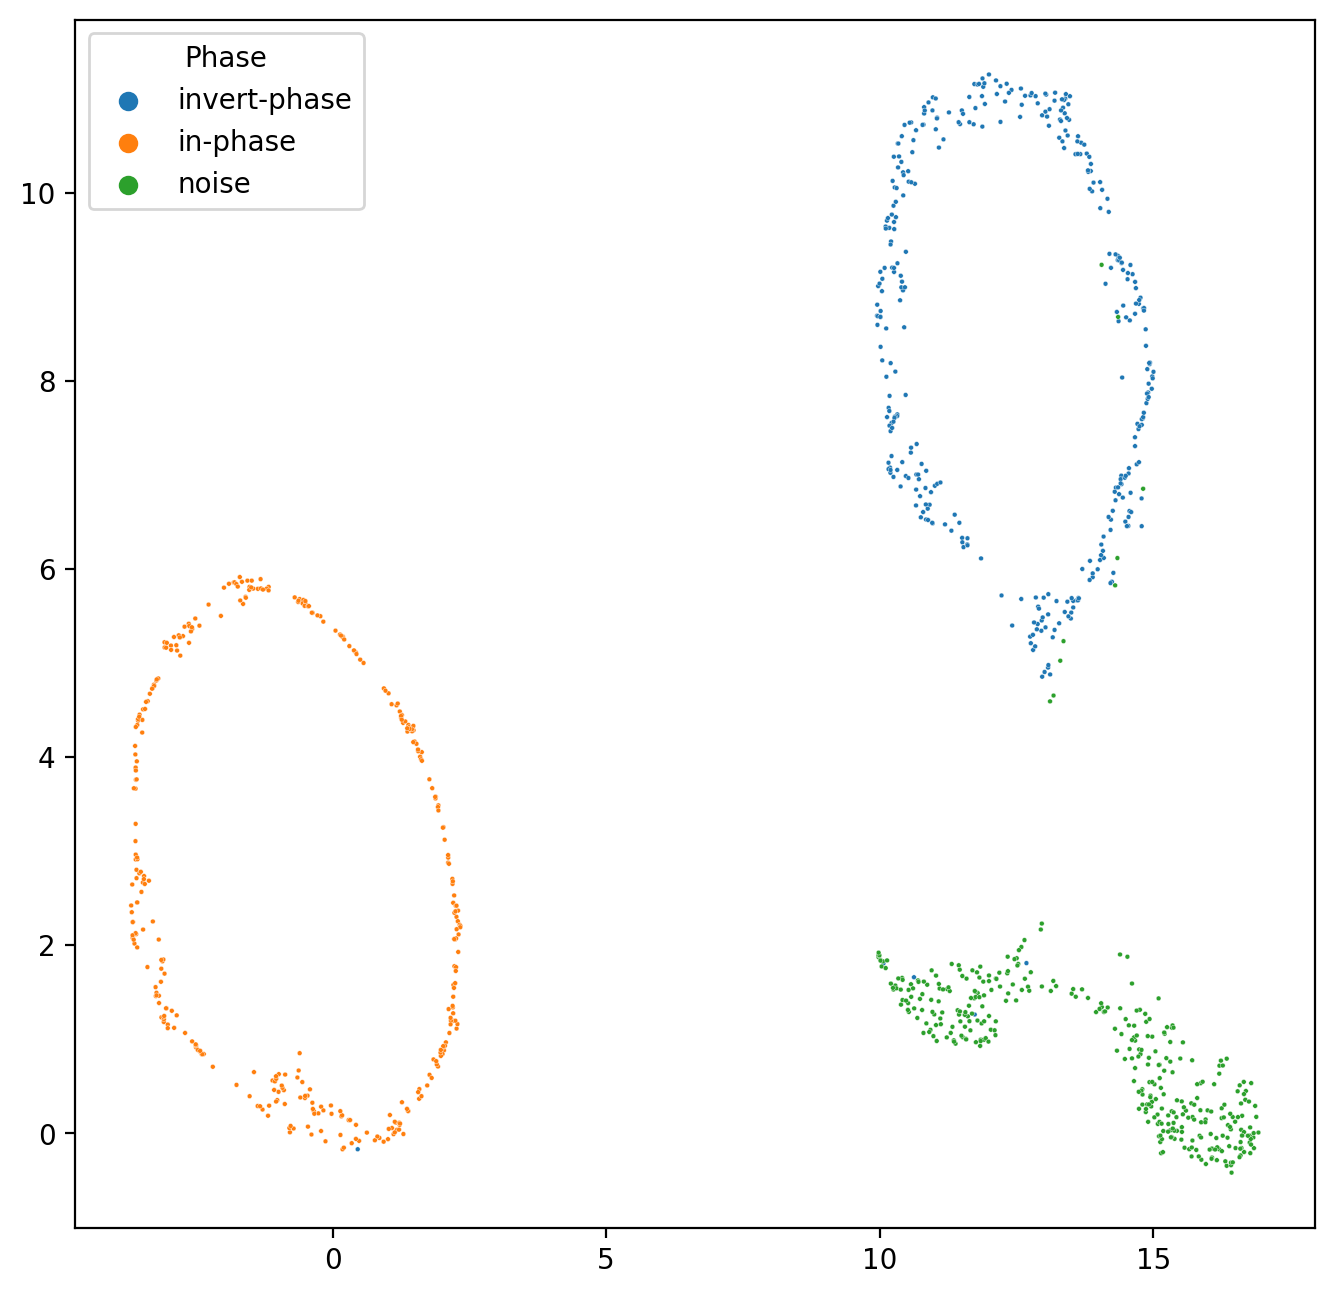

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8), dpi = 200)

sns.scatterplot(mapper[:,0],mapper[:,1], 
                hue = y.map({
        0:'noise',
        1:'in-phase',
        -1:'invert-phase',
    }), 
                s=3,
               cmap = "Blue")

In [113]:

p = umap.plot.interactive(mapper,labels = y,  hover_data=hover_data,point_size=2)
umap.plot.show(p)

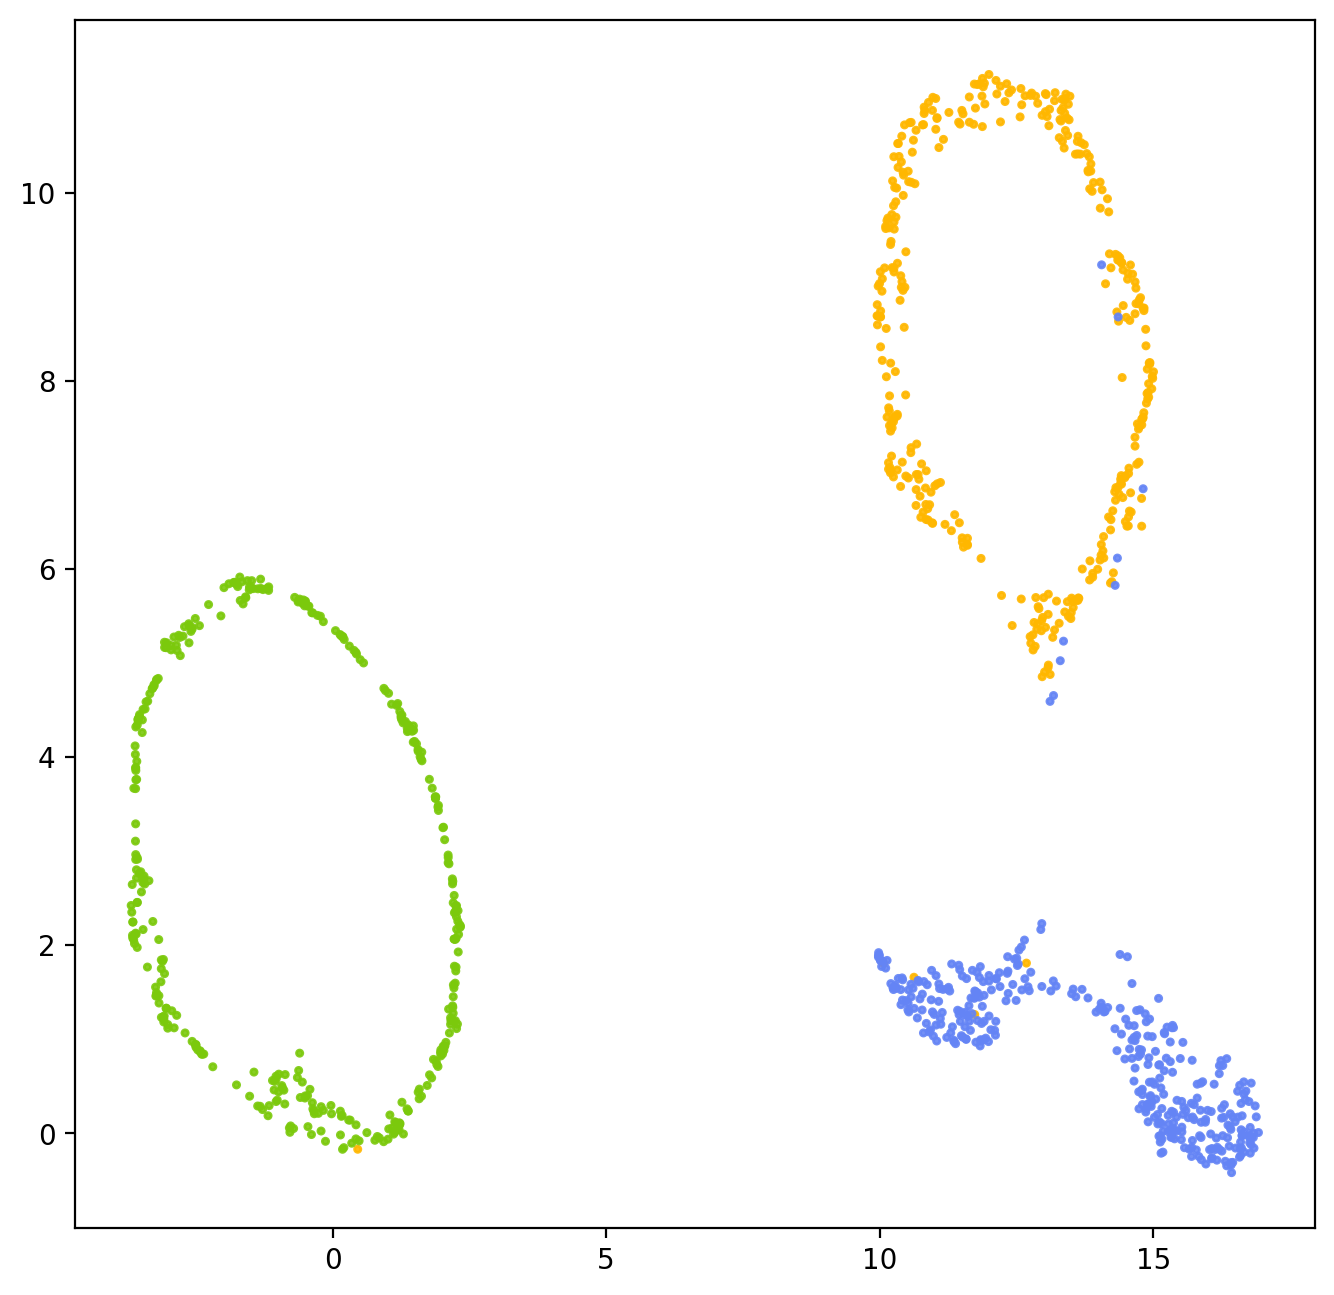

In [40]:
plt.figure(figsize=(8,8), dpi = 200)

plt.scatter(mapper[:,0],
            mapper[:,1], 
            c=y.map(color_map), 
            alpha = 0.9, 
            s=5)

In [21]:
umap.plot.points(mapper, labels=y, width=1000, height=1000,  theme="red",color_key="RGB",)


ValueError: ignored

In [142]:
y_df.value_counts()

 1    589
 0    589
-1    589
dtype: int64

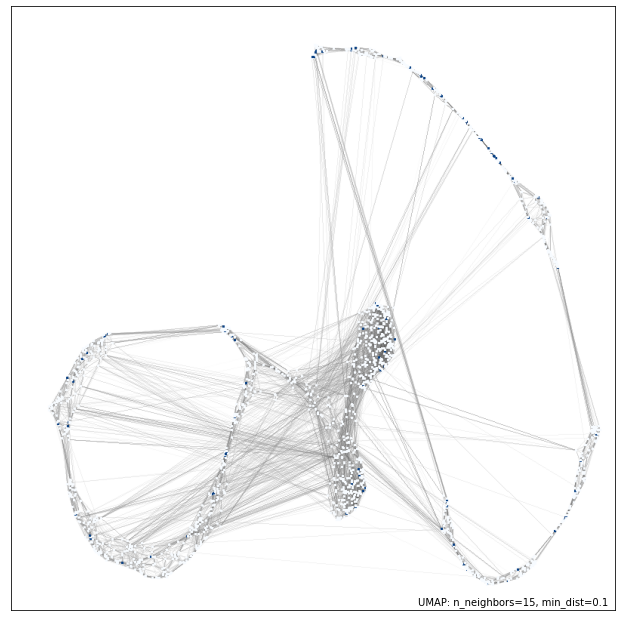

In [63]:
umap.plot.connectivity(mapper, show_points=True)

/usr/local/lib/python3.6/dist-packages/umap/plot.py:850: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  "Hammer edge bundling is expensive for large graphs!\n"


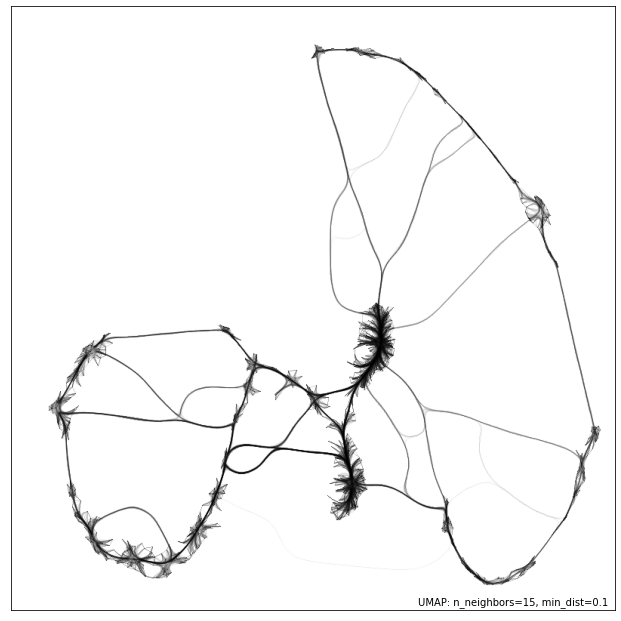

In [64]:
umap.plot.connectivity(mapper, edge_bundling='hammer')

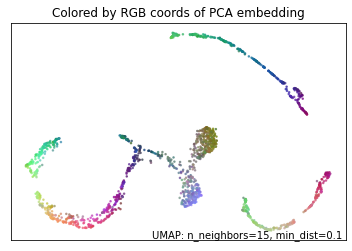

In [65]:
umap.plot.diagnostic(mapper, diagnostic_type='pca')

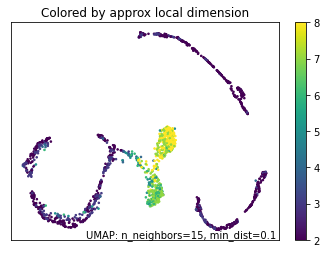

In [66]:
local_dims = umap.plot.diagnostic(mapper, diagnostic_type='local_dim')